#<font  color='Orange'>Data Preparation & KNN Classification</font>


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [43]:
from sklearn.impute import SimpleImputer
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Downloading...
From: https://drive.google.com/uc?id=1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS
To: /Users/davidhristov/Desktop/Intro to Data Science/Labs/Lab2a/warmup/diabetes.csv
100%|██████████████████████████████████████| 23.8k/23.8k [00:00<00:00, 1.40MB/s]


In [17]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset.

In [19]:
#add your code
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               754 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             760 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       758 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [21]:
df.isnull().sum()

Pregnancies                 14
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [26]:
missing_values_percentage = df.isnull().sum() / len(df) 
missing_values_percentage * 100

Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

<Axes: >

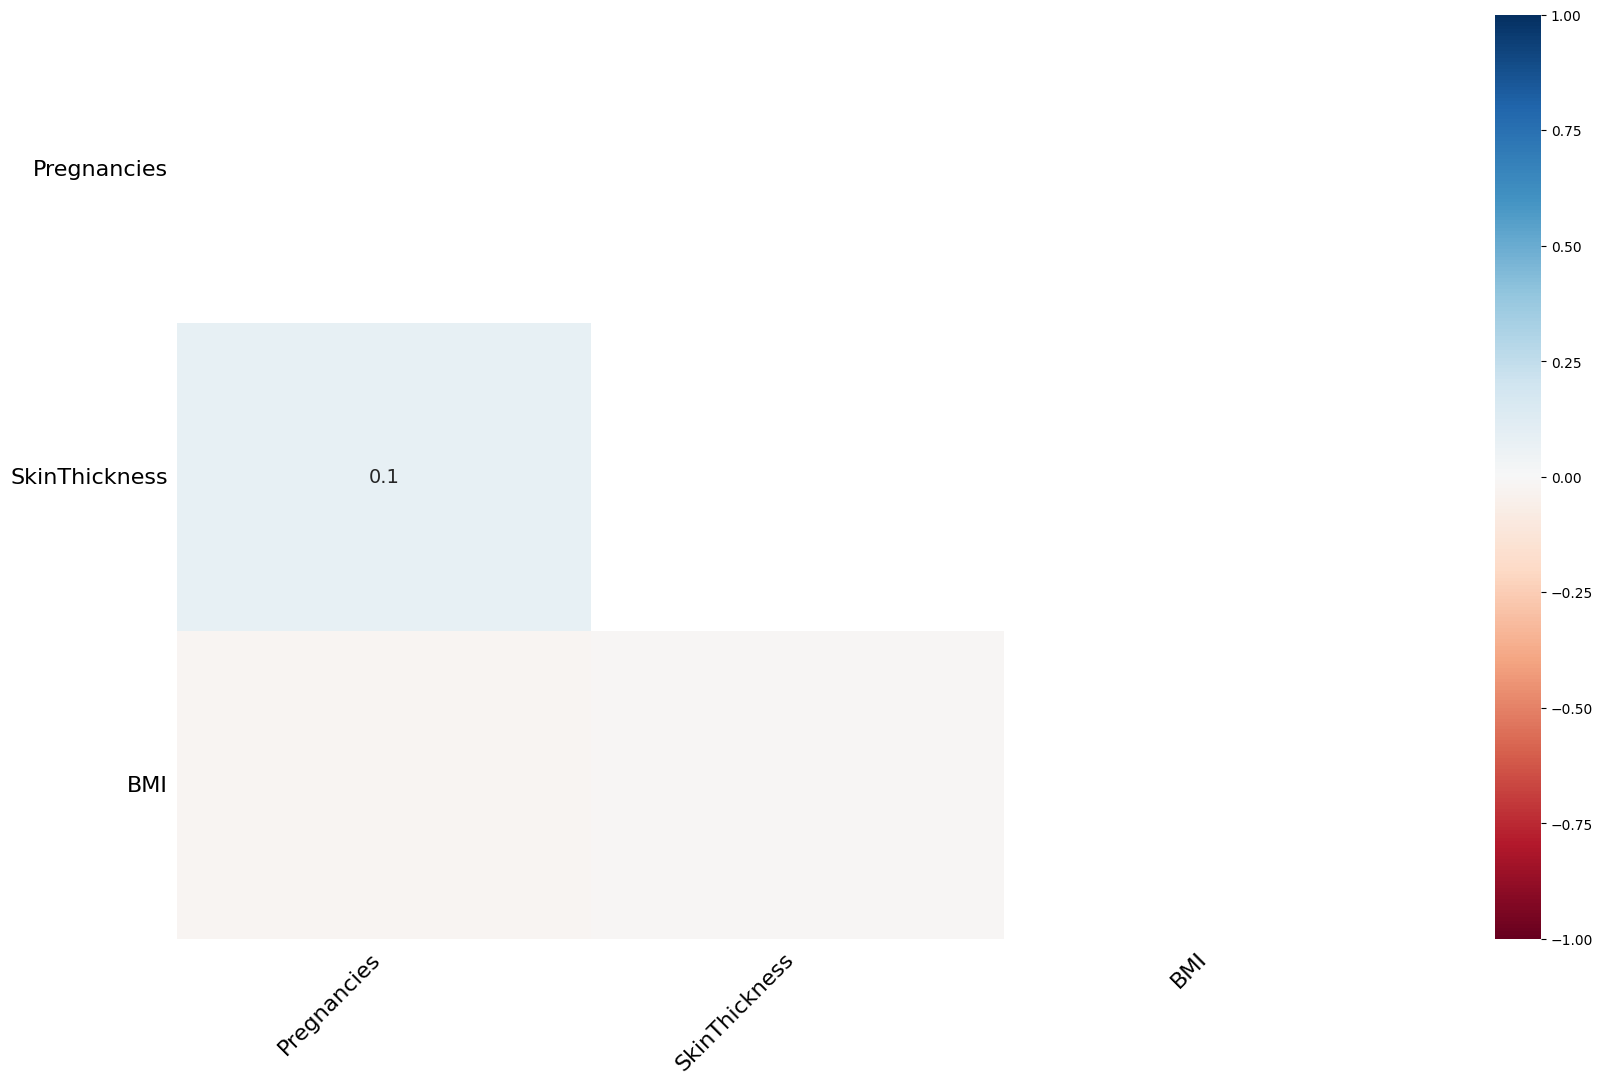

In [30]:
import missingno as msno

msno.heatmap(df)

Visualize the missing values using Missingno library

<Axes: >

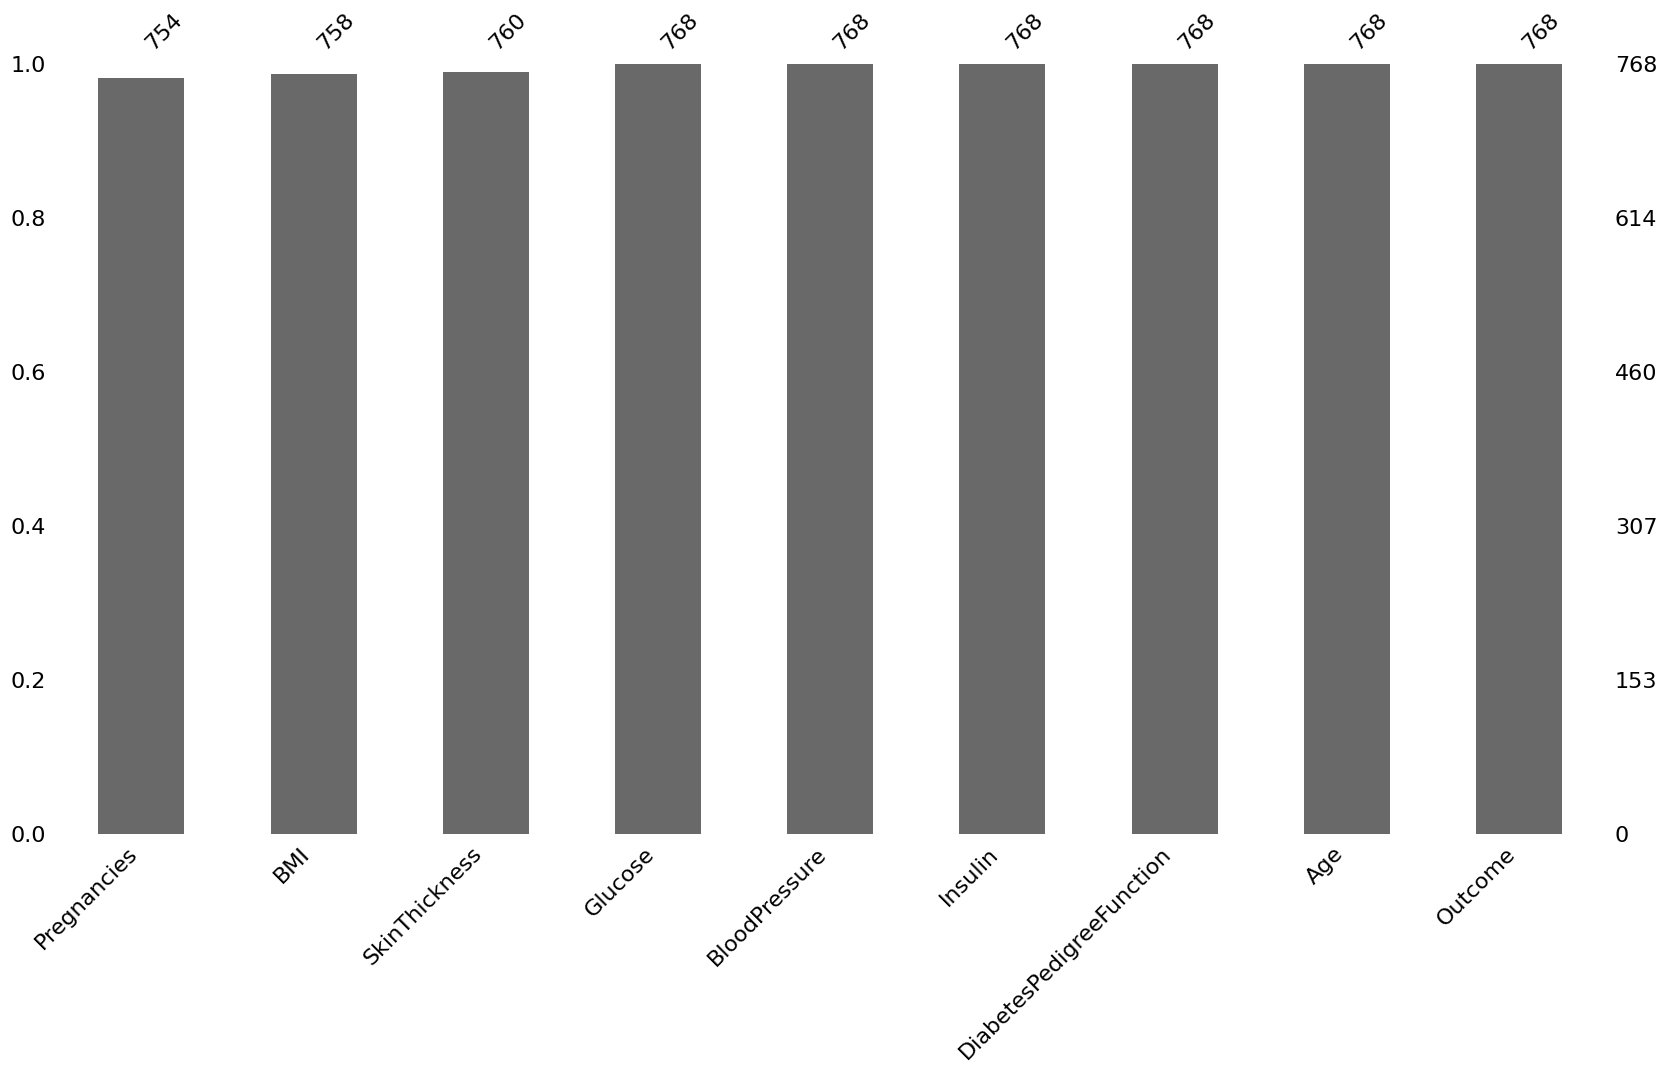

In [38]:
msno.bar(df, figsize=(20,10), sort='ascending', labels=True)

<Axes: >

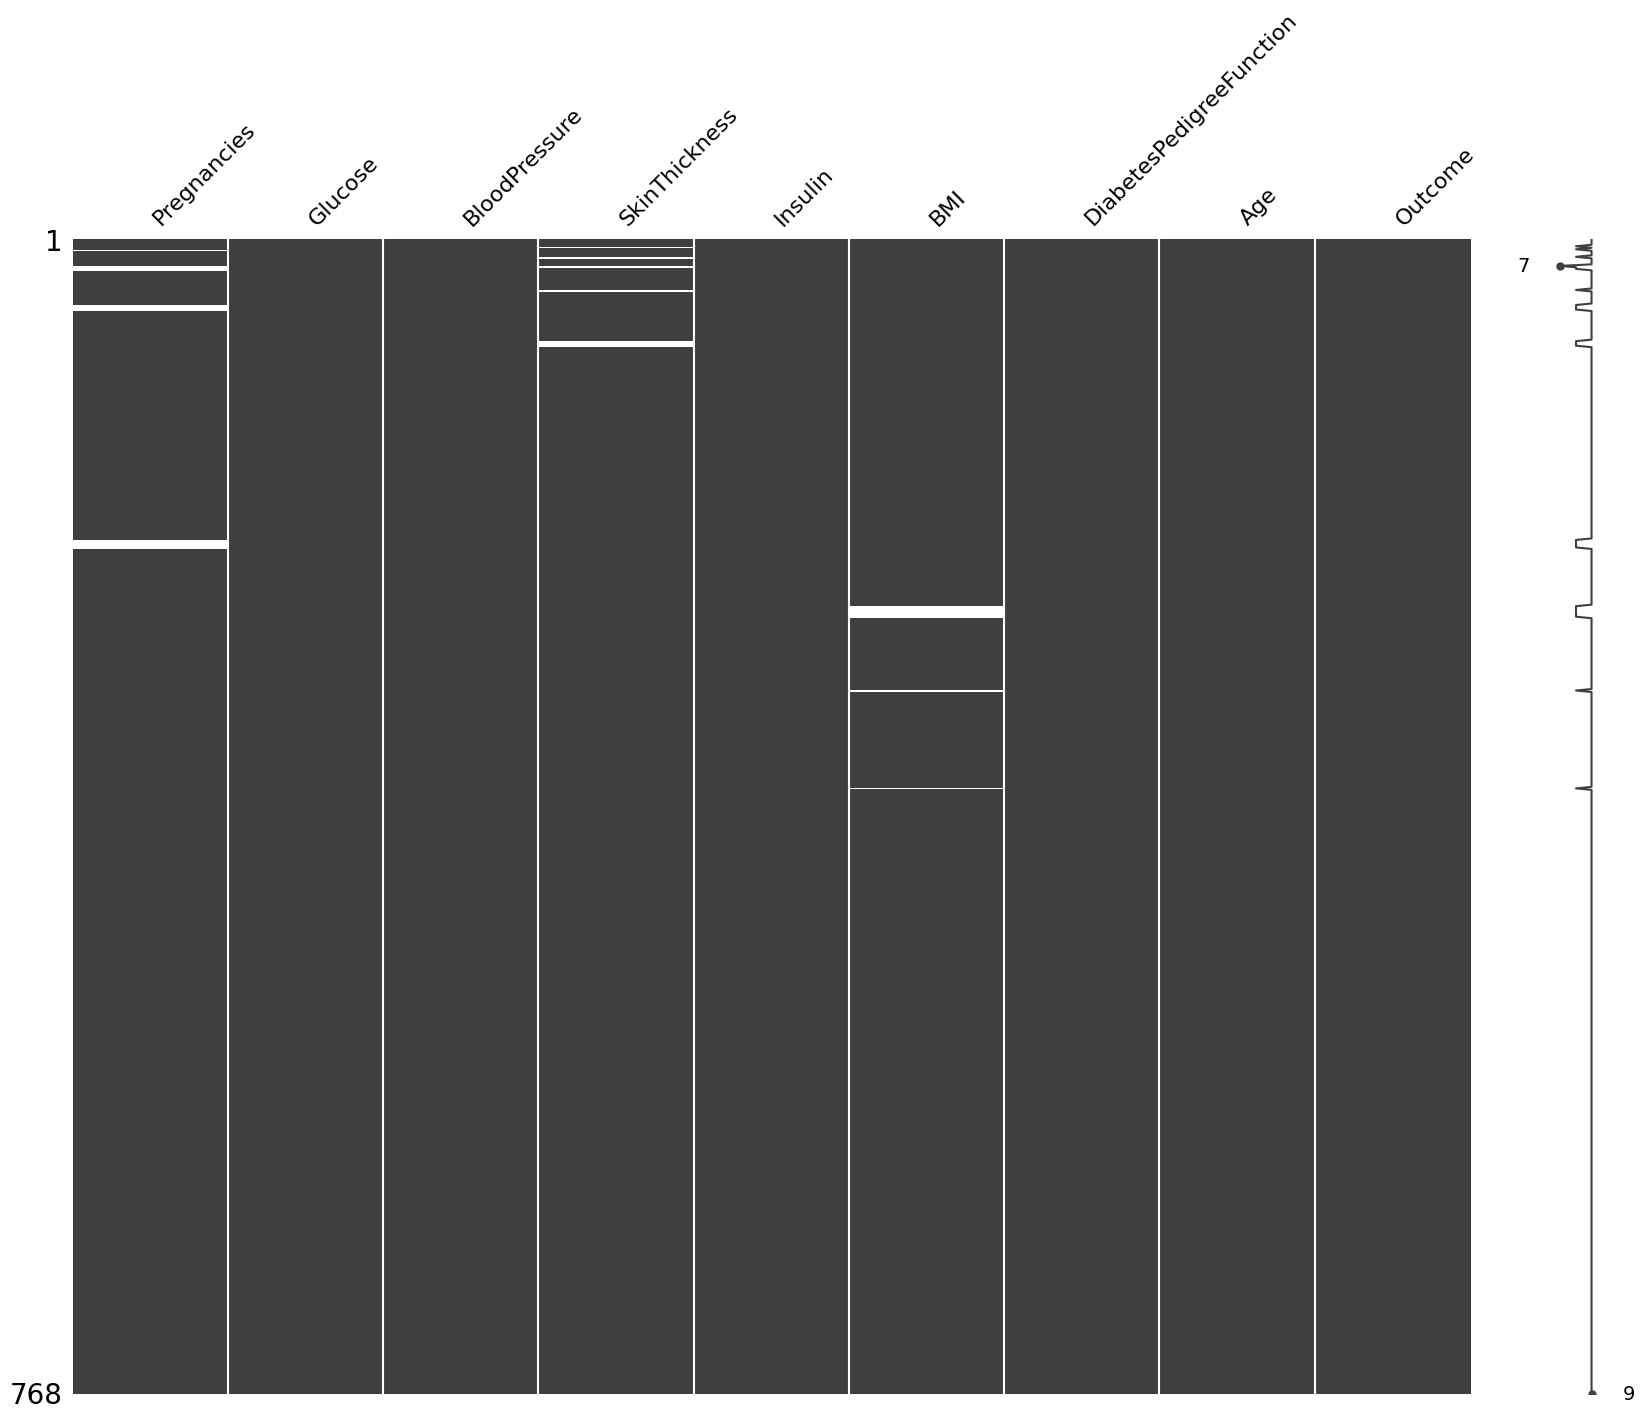

In [39]:
msno.matrix(df, figsize=(20,15))

## <font color = 'Orange'>Handle the missing values</font>

In [40]:
#add your code
df.head(30)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1
5,5.0,116,74,NaN,0,25.6,0.201,30,0
6,3.0,78,50,32.0,88,31.0,0.248,26,1
7,NaN,115,0,0.0,0,35.3,0.134,29,0
8,2.0,197,70,45.0,543,30.5,0.158,53,1
9,8.0,125,96,0.0,0,0.0,0.232,54,1


In [52]:
#Imputing missing values with SimpleImputer 
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)

df['Pregnancies'] = constant_imputer.fit_transform([df['Pregnancies']])[0]

In [55]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63,0
764,2.0,122,70,27.0,0,36.8,0.340,27,0
765,5.0,121,72,23.0,112,26.2,0.245,30,0
766,1.0,126,60,0.0,0,30.1,0.349,47,1


In [49]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                8
Insulin                      0
BMI                         10
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [61]:
# zamenuvam site null vrednosti kaj BMI so mean (sredna vrednost)
mean_imputer = SimpleImputer(strategy='mean')

df['BMI'] = mean_imputer.fit_transform(df[['BMI']])
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63,0
764,2.0,122,70,27.0,0,36.8,0.340,27,0
765,5.0,121,72,23.0,112,26.2,0.245,30,0
766,1.0,126,60,0.0,0,30.1,0.349,47,1


In [62]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               8
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
df['SkinThickness'] = mean_imputer.fit_transform(df[['SkinThickness']])

In [66]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [67]:
#add your code
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.000000,0,33.6,0.627,50,1
1,1.0,85,66,29.000000,0,26.6,0.351,31,0
2,8.0,183,64,0.000000,0,23.3,0.672,32,1
3,1.0,89,66,23.000000,94,28.1,0.167,21,0
4,0.0,137,40,35.000000,168,43.1,2.288,33,1
5,5.0,116,74,20.536842,0,25.6,0.201,30,0
6,3.0,78,50,32.000000,88,31.0,0.248,26,1
7,0.0,115,0,0.000000,0,35.3,0.134,29,0
8,2.0,197,70,45.000000,543,30.5,0.158,53,1
9,8.0,125,96,0.000000,0,0.0,0.232,54,1


Print the first rows of your final Dataset

In [68]:
#add your code
df.to_csv('modified_data_diabetes.csv', index=False)

In [69]:
df_mdf = pd.read_csv('modified_data_diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.000000,0,33.6,0.627,50,1
1,1.0,85,66,29.000000,0,26.6,0.351,31,0
2,8.0,183,64,0.000000,0,23.3,0.672,32,1
3,1.0,89,66,23.000000,94,28.1,0.167,21,0
4,0.0,137,40,35.000000,168,43.1,2.288,33,1
5,5.0,116,74,20.536842,0,25.6,0.201,30,0
6,3.0,78,50,32.000000,88,31.0,0.248,26,1
7,0.0,115,0,0.000000,0,35.3,0.134,29,0
8,2.0,197,70,45.000000,543,30.5,0.158,53,1
9,8.0,125,96,0.000000,0,0.0,0.232,54,1


# <font color='orange'>KNN Classification</font>

#<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [81]:
#add your code
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

classifier = KNeighborsClassifier(n_neighbors=5)

In [80]:
len(df_mdf)

768

In [82]:
#Split the dataset for training and testing in ratio 80:20

#x = df_mdf.iloc[:,:-1]: This selects all rows and all columns except the last one, which are the feature columns.
# y = df_mdf.iloc[:,-1]: This selects all rows and only the last column, which is the target variable.

x = df_mdf.iloc[:,:-1]
y = df_mdf.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [84]:
#add your code
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [86]:
#add your code
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [87]:
#add your code
from sklearn.metrics import f1_score, classification_report

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       106
           1       0.52      0.46      0.49        48

    accuracy                           0.70       154
   macro avg       0.65      0.63      0.64       154
weighted avg       0.69      0.70      0.70       154




Precision: For class 0, precision is 0.77, meaning that 77% of the instances classified as 0 are actually 0. For class 1, precision is 
0.52, so 52% of instances classified as 1 are actually 1.

Recall: For class 0, recall is 0.81, meaning 81% of all actual 0 instances were correctly classified. For class 1, recall is  0.46, meaning 46% of all actual 1 instances were correctly classified.

F1-score: This is the harmonic mean of precision and recall for each class. The F1-score is 0.79 for class 0 and 0.49 for class 1. Higher values indicate better performance.

Accuracy: The model has an overall accuracy of 0.70, meaning it correctly classifies 70% of the instances.

Macro Average: This average considers each class equally. The macro-average F1-score here is 0.64, giving a general sense of the model’s balanced performance across classes.

Weighted Average: This average is weighted by the number of instances in each class (support). The weighted F1-score is 0.70, which considers that class 0 has more samples than class 1.

Support refers to the number of true instances for each class in the dataset. There are 106 instances of class 0 and 48 instances of class 1.